# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [3]:
def svd_validation(A):
    u,s,vh= svd(A)
    m,n = np.shape(A)
    suma=np.zeros((m,n))
    for i in range(min(m,n)):
        suma+=s[i]*u[:,i].reshape(-1,1)*vh[i,:]
    if (np.allclose(A,suma)):
        return True
    else:
        return False


In [4]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

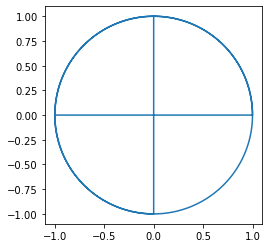

In [7]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [8]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


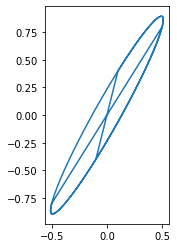

In [9]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

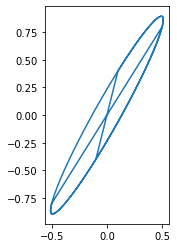

In [10]:
u, s, vh = svd(A)
show_circle(A @ circle)

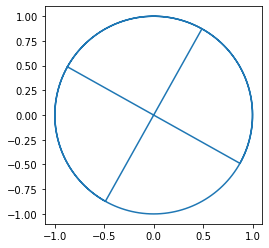

In [11]:
show_circle(u @ circle)

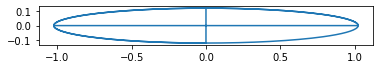

In [12]:
show_circle(np.diag(s) @ circle)

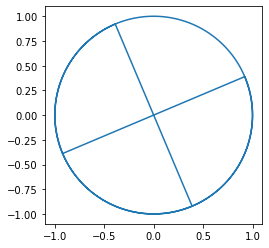

In [13]:
show_circle(vh @ circle)

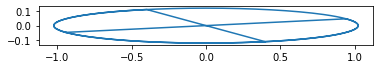

In [14]:
show_circle(np.diag(s)@vh@circle)

__Respuesta:__ Al ser U y V unitarias, rotan la circunferencia sin cambiar su área, mientras que al aplicar $\Sigma$ solo modifica el tamaño de la circunferencia sin rotarla

__Respuesta:__ EL operador lineal A,realiza las tres aplicaciones anteriores, primero rota la circunferencia, modifica su tamaño y luego la vuelve a rotar

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [15]:
from pathlib import Path
from PIL import Image
from scipy.linalg import norm

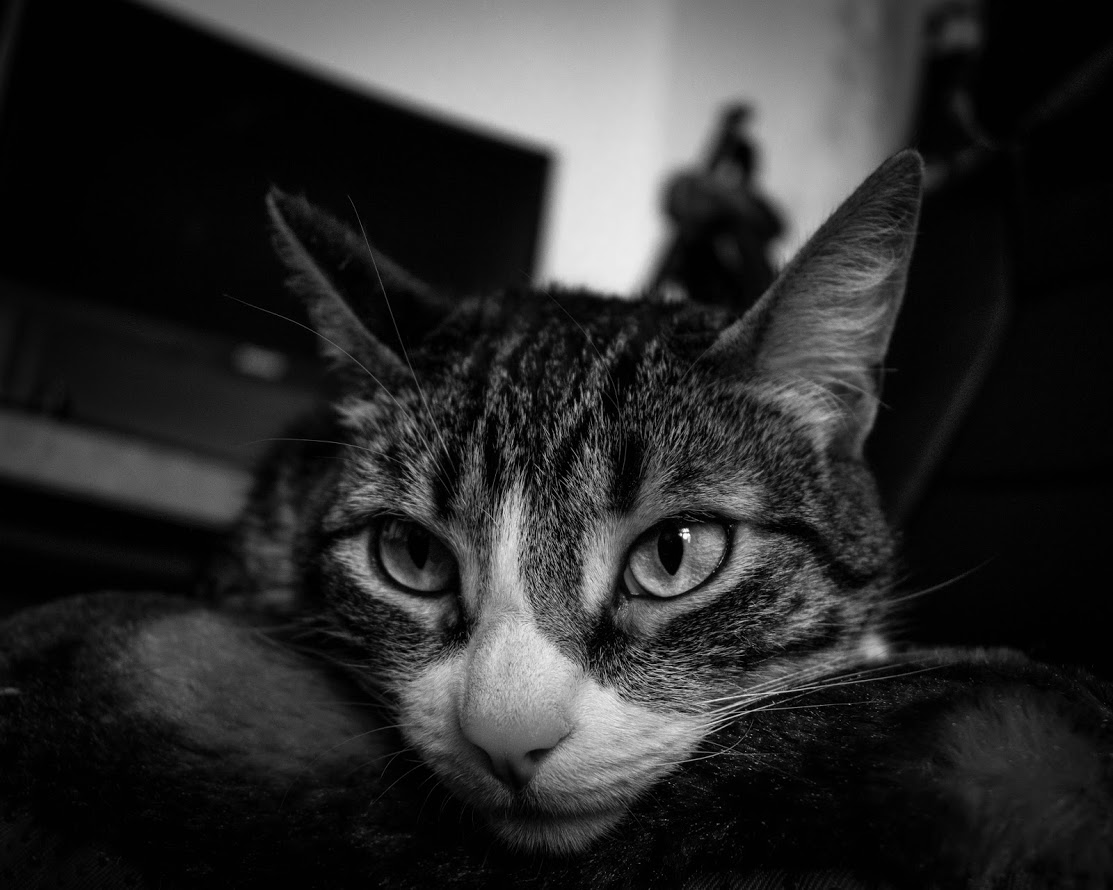

In [16]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [17]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [18]:
def low_rank_svd_approximation(A, l):
    # Retornar la aproximación de A
    u,s,vh= svd(A)
    m,n = np.shape(A)
    aprox=np.zeros((m,n))
    for i in range(min(l,m,n)):
        aprox+=s[i]*u[:,i].reshape(-1,1)*vh[i,:]
    #error
    print("El error es:", norm(A-aprox,'fro'))
    return aprox

El error es: 16045.71975789755


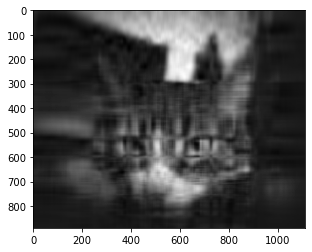

In [19]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

El error es: 8144.192595286205


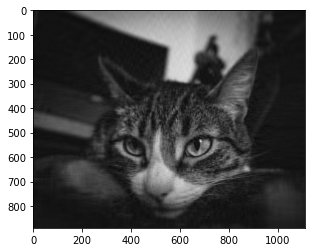

In [20]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

El error es: 54.7345633068144


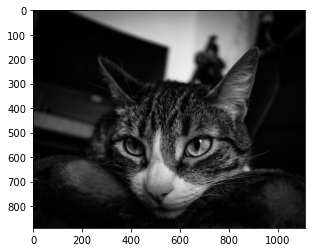

In [21]:
cat50 = low_rank_svd_approximation(cat_np, l=800)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [22]:
def low_rank_svd_tol_approximation(A, tol):
    u,s,vh=svd(A)
    m,n =np.shape(A)
    rango_aprox=100000000
    l=0
    error_down=0
    error_up=0
    while (rango_aprox>tol and l<(min(m,n))):
        for i in range(l+1,min(m,n)):
            error_up+= s[i]**2            
        for i in range(min(m,n)):
            error_down+=s[i]**2
        rango_aprox=(error_up/error_down)**(1/2)
        l+=1
    
    return low_rank_svd_approximation(A, l)

El error es: 1901.0256477814835


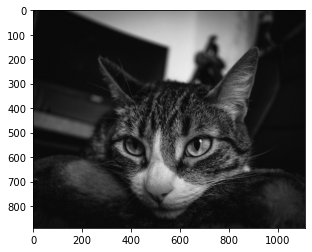

In [23]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

El error es: 0.15748660390294428


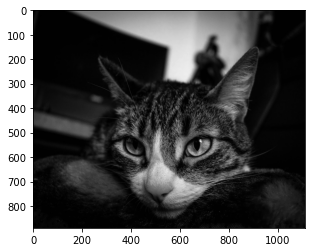

In [24]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

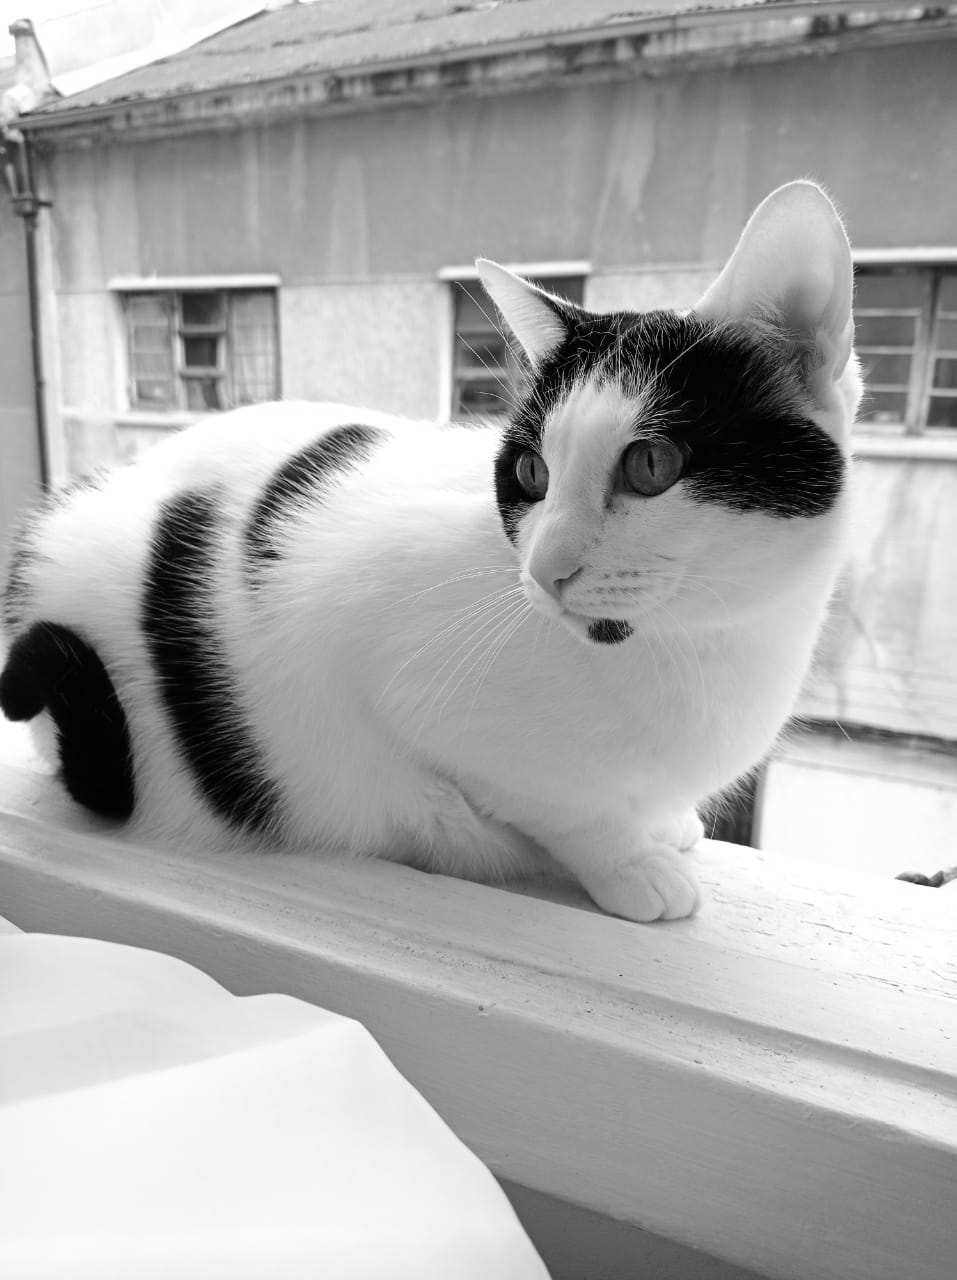

In [25]:
your_img_name = "aurora.jpeg"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L')
your_img

In [26]:
your_img_np = np.array(your_img)
print(your_img_np.shape)

(1280, 957)


El error es: 19687.847315813204


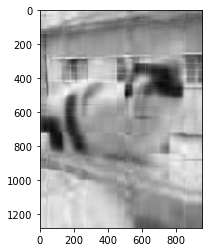

In [27]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

El error es: 12883.248968384967


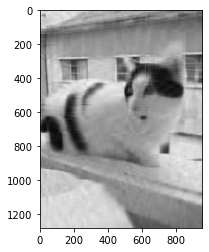

In [28]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

El error es: 8978.51886856996


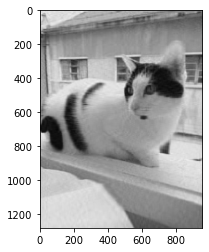

In [29]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

El error es: 2.9094161287768836


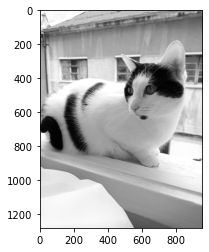

In [30]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ Por un lado, el útil comprimir utilizando SVD, pues no necesitamos utilizar la matriz A completa, sino que podemos aproximar con matrices más pequeñas. aún así, para lograr ver la imagen con claridad se necesita una gran cantidad de iteraciones, por lo que existen formas eficientes de comprimir imágenes

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [31]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [32]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,947.9
358,Magallanes,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,14.0,16.0,18.0,18.0,18.0,19.0,20.0,2936.9
359,Magallanes,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,2.0,8.0,12.0,13.0,13.0,13.0,19.0,19.0,21.0,7446.8
360,Magallanes,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,195.9


In [33]:
start_date = pd.to_datetime("2020-10-1",format='%Y-%m-%d')
end_date = pd.to_datetime("2020-10-11",format='%Y-%m-%d')

In [34]:
covid_tasa_promedio_nuevos =  (pd.melt(covid_comunas,id_vars=["region","codigo_region","comuna","codigo_comuna","poblacion","tasa"],var_name='fecha',value_name="casos_totales")
          .dropna(subset=['codigo_comuna']).fillna(0)
          .assign(fecha= lambda x: pd.to_datetime(x["fecha"],format='%Y-%m-%d')).sort_values(by=['fecha'])
          .assign(casos_nuevos= lambda s: s.groupby("comuna")["casos_totales"].diff())
          .fillna(0).loc[lambda x: (x["fecha"]>=start_date)&(x["fecha"]<=end_date)]
          .groupby(["region","comuna"]).apply(lambda x: x["casos_nuevos"].mean())
          .to_frame(name= "promedio_casos_nuevos")
          .merge(covid_comunas[["poblacion","region","comuna"]],how="inner", on=["region","comuna"])
        .assign(tasa_promedio_casos_nuevos= lambda x: (x["promedio_casos_nuevos"]*100000)/x["poblacion"])
          .sort_values(by=["tasa_promedio_casos_nuevos"],ascending=False)
         )

In [35]:
covid_tasa_promedio_nuevos.head()

,region,comuna,promedio_casos_nuevos,poblacion,tasa_promedio_casos_nuevos
163,Magallanes,Timaukel,3.333333,282.0,1182.033097
162,Magallanes,San Gregorio,4.000000,681.0,587.371512
156,Magallanes,Laguna Blanca,1.333333,264.0,505.050505
158,Magallanes,Porvenir,34.333333,7323.0,468.842460
160,Magallanes,Punta Arenas,631.333333,141984.0,444.651040


__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Las comunas con mayor Tasa Promedio de Casos Nuevos, se encuentran todas en la región de Magallanes

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [36]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,728,794,738,737,832,542,343,706,777,1058
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,648,972,932,1046,1044,796,714,694,946,1752
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1229,1571,1890,2239,3825,1749,1354,1858,1238,1906
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,319,792,838,1020,939,563,340,237,838,863
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,823,1008,1128,1057,1026,473,1503,1050,1125,1351


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [37]:
covid_pcr_melt = (pd.melt(covid_pcr,id_vars=["region","codigo_region","poblacion"],var_name='fecha',value_name="nm_pcr").
                  drop(["codigo_region","poblacion"],axis=1)
                  .fillna({'nm_pcr':0}).assign(fecha= lambda x: pd.to_datetime(x["fecha"],format='%Y-%m-%d'))
) 

covid_pcr_melt

,region,fecha,nm_pcr
0,Arica y Parinacota,2020-04-09,70.0
1,Tarapacá,2020-04-09,0.0
2,Antofagasta,2020-04-09,182.0
3,Atacama,2020-04-09,57.0
4,Coquimbo,2020-04-09,0.0
...,...,...,...
3291,Araucanía,2020-10-31,1716.0
3292,Los Ríos,2020-10-31,1012.0
3293,Los Lagos,2020-10-31,3670.0
3294,Aysén,2020-10-31,235.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [38]:
covid_casos_melt = (covid_comunas.drop(["codigo_region","comuna","codigo_comuna","poblacion","tasa"],axis=1)
                    .melt(id_vars = ["region"],var_name='fecha',value_name="casos_totales")
                    .fillna({'casos_totales':0}).assign(fecha= lambda x: pd.to_datetime(x["fecha"],format='%Y-%m-%d'))
                    .groupby(["region","fecha"]).agg(lambda x: sum(x))
                   )

covid_casos_melt


casos_totales
region      fecha                    
Antofagasta 2020-03-30           29.0
            2020-04-01           32.0
            2020-04-03           49.0
            2020-04-06           65.0
            2020-04-08           72.0
...                               ...
Ñuble       2020-10-16         9129.0
            2020-10-19         9270.0
            2020-10-24         9534.0
            2020-10-26         9634.0
            2020-10-30         9815.0

[1024 rows x 1 columns]

Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [64]:
covid_corr_casos_pcr = (covid_pcr_melt.merge(covid_casos_melt,how="outer",on=["region","fecha"])
                        .fillna({'nm_pcr':0}).ffill(axis=1)
                        .groupby(["region","fecha"]).agg(lambda x: sum(x))                        
                        .groupby("region")[["nm_pcr","casos_totales"]].corr()

)
covid_corr_casos_pcr

nm_pcr  casos_totales
region                                                   
Antofagasta        nm_pcr         1.000000       0.388778
                   casos_totales  0.388778       1.000000
Araucanía          nm_pcr         1.000000       0.510823
                   casos_totales  0.510823       1.000000
Arica y Parinacota nm_pcr         1.000000       0.520307
                   casos_totales  0.520307       1.000000
Atacama            nm_pcr         1.000000       0.528584
                   casos_totales  0.528584       1.000000
Aysén              nm_pcr         1.000000       0.765909
                   casos_totales  0.765909       1.000000
Biobío             nm_pcr         1.000000       0.548201
                   casos_totales  0.548201       1.000000
Coquimbo           nm_pcr         1.000000       0.499326
                   casos_totales  0.499326       1.000000
Los Lagos          nm_pcr         1.000000       0.665207
                   casos_totales  0.665207       1.000000
Los Ríos           nm_pcr         1.000000       0.687186
                   casos_totales  0.687186       1.000000
Magallanes         nm_pcr         1.000000       0.481241
                   casos_totales  0.481241       1.000000
Maule              nm_pcr         1.000000       0.524009
                   casos_totales  0.524009       1.000000
Metropolitana      nm_pcr         1.000000       0.352878
                   casos_totales  0.352878       1.000000
O’Higgins          nm_pcr         1.000000       0.477532
                   casos_totales  0.477532       1.000000
Tarapacá           nm_pcr         1.000000       0.432417
                   casos_totales  0.432417       1.000000
Valparaíso         nm_pcr         1.000000       0.455618
                   casos_totales  0.455618       1.000000
Ñuble              nm_pcr         1.000000       0.503855
                   casos_totales  0.503855       1.000000

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ De los datos anteriores, se puede notar que existe una leve correlación entre la cantidad de exámenes PCR y cantidad de casos de cada comuna. Este resultado es lo que uno esperaría, pues dado el crecimiento de la población contagiada, al realizar más exámenes debería aumentar la cantidad de casos positivos

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ Que se puede observar en los distintos grupos etarios, respecto a las personas hospitalizadas en UCI y fallecimientos


In [40]:
covid_uci= (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto9/HospitalizadosUCIEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_uci.head()

,grupo_de_edad,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,<=39,23,23,26,40,40,38,39,42,46,...,47,48,49,44,46,48,49,50,47,42
1,40-49,23,27,34,36,40,40,38,39,48,...,53,52,46,49,51,54,57,63,66,65
2,50-59,53,67,74,84,89,95,101,109,102,...,168,160,154,153,155,151,155,154,160,163
3,60-69,39,46,56,68,75,78,82,93,89,...,238,242,233,234,237,242,241,240,249,242
4,>=70,35,37,47,52,63,76,77,79,75,...,253,257,247,243,241,245,243,241,242,244


In [49]:
covid_uci_melt= ( covid_uci.melt(id_vars=["grupo_de_edad"],var_name="fecha",value_name="casos_uci")
                  .fillna({'casos_totales':0}).assign(fecha= lambda x: pd.to_datetime(x["fecha"],format='%Y-%m-%d'))
                  .groupby(["grupo_de_edad"])[["casos_uci"]].agg(lambda x: x.mean())
)
covid_uci_melt

,casos_uci
grupo_de_edad,
40-49,108.747664
50-59,268.406542
60-69,363.962617
<=39,86.939252
>=70,268.425234


In [50]:
covid_fallecido= (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_fallecido.head()

,grupo_de_edad,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,<=39,2,2,3,3,3,3,3,3,4,...,308,310,310,311,311,313,313,314,315,317
1,40-49,1,2,2,2,2,2,2,2,2,...,467,467,469,469,472,473,473,477,480,483
2,50-59,1,2,2,3,3,5,5,6,8,...,1396,1398,1404,1409,1414,1415,1415,1423,1425,1431
3,60-69,9,10,12,12,12,12,12,14,16,...,2910,2925,2943,2957,2966,2971,2973,2994,3005,3013
4,70-79,21,22,24,28,29,30,31,32,36,...,3890,3898,3906,3915,3934,3942,3943,3973,3981,3996


In [53]:
covid_fallecido_melt= ( covid_fallecido.melt(id_vars=["grupo_de_edad"],var_name="fecha",value_name="casos_fallecidos")
                  .fillna({'casos_fallecidos':0}).assign(fecha= lambda x: pd.to_datetime(x["fecha"],format='%Y-%m-%d'))
                .groupby(["grupo_de_edad"])[["casos_fallecidos"]].agg(lambda x: x.mean())
                    
)
covid_fallecido_melt

,casos_fallecidos
grupo_de_edad,
40-49,242.480583
50-59,722.616505
60-69,1504.548544
70-79,2019.014563
80-89,1813.941748
<=39,158.864078
>=90,648.771845


__Respuesta:__ Se puede observar que los pacientes en UCI aumenta considerablemente con la edad, así mismo la mortalidad aumentó significativamente con la edad

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.